# A Pleasent Flight
 Historical Air Crash + Delay Investigation

Unfortunely, there were many aviation accidents that caused innocent people to perish. While lessons we learnt in the past tragedy have made flying now more and more safer, the figures of planes falling from the sky still frightens a few people from having a pleasent flight. In this data analysis, we are going persuade thoes who are afraid by to investigate how safe are planes and, if one is still concerned, how to maximize one's safety? To make our report also interesting to general public, we will also investigate how one can minimize delays. 

In [1]:
import pandas as pd
import numpy as np
from numpy import nan as Nan
import matplotlib.pyplot as plt
import requests
from string import digits
import wget # you need to "pip install wget"  
import glob
import time

import plotly.figure_factory as ff
import xml.etree.ElementTree as ET # to read one dataset in XML format

## Clean Air Crash Data

In [2]:
crash_df = pd.read_csv("datasets/crash/Airplane_Crashes_and_Fatalities_Since_1908.csv")
etree = ET.parse("datasets/crash/AviationData.xml")



In [3]:
xml_root = etree.getroot()

interest_columns = ["EventId","EventDate","Location","Country","Latitude","Longitude","AirportCode","InjurySeverity","AircraftDamage",
                    "AircraftCategory","NumberOfEngines","EngineType","Schedule","TotalUninjured","TotalMinorInjuries",
                    "TotalSeriousInjuries","TotalFatalInjuries","WeatherCondition","BroadPhaseOfFlight","RegistrationNumber","PurposeOfFlight"]

NTSB_crash_df = pd.DataFrame(columns=interest_columns)

for elem in xml_root: # This loop will run only once
    for row in elem: 
        if not(row.attrib["PurposeOfFlight"]=="Business"):
            continue
        information = list()
        for interest in interest_columns:
            if not (row.attrib[interest]==""):
                information.append(row.attrib[interest])
            else:
                information.append(Nan)
        row_information = pd.Series(information,index=interest_columns)
        NTSB_crash_df = NTSB_crash_df.append(row_information,ignore_index=True)
            
# this may need to run for a while. It takes 18 seconds on my computer
    

In [4]:
NTSB_crash_df[(NTSB_crash_df["AircraftCategory"]=="Airplane") & (NTSB_crash_df["EngineType"]!="Reciprocating") & (NTSB_crash_df["Country"]=="United States")]

,EventId,EventDate,Location,Country,Latitude,Longitude,AirportCode,InjurySeverity,AircraftDamage,AircraftCategory,...,EngineType,Schedule,TotalUninjured,TotalMinorInjuries,TotalSeriousInjuries,TotalFatalInjuries,WeatherCondition,BroadPhaseOfFlight,RegistrationNumber,PurposeOfFlight
2,20191031X31506,10/31/2019,"New Braunfels, TX",United States,29.705833,-98.043333,BAZ,Non-Fatal,Minor,Airplane,...,NaN,NaN,1,NaN,1,NaN,VMC,NaN,N850BK,Business
6,20191021X62154,10/16/2019,"Augusta, GA",United States,33.371945,-81.971667,AGS,Non-Fatal,NaN,Airplane,...,Turbo Fan,NaN,NaN,NaN,1,NaN,VMC,TAXI,N307KP,Business
7,20191005X82852,10/05/2019,"Kokomo, IN",United States,40.475000,-86.063333,OKK,Fatal(1),Destroyed,Airplane,...,NaN,NaN,NaN,NaN,NaN,1,VMC,MANEUVERING,N326CW,Business
8,20191003X13056,10/03/2019,"Lansing, MI",United States,42.780278,-84.606111,LAN,Fatal(5),Substantial,Airplane,...,Turbo Prop,NaN,NaN,NaN,1,5,IMC,APPROACH,N700AQ,Business
10,20190829X34852,08/29/2019,"Olney, TX",United States,33.350833,-98.819167,ONY,Non-Fatal,Substantial,Airplane,...,Turbo Prop,NaN,NaN,1,NaN,NaN,VMC,TAKEOFF,N8517Q,Business
14,20190815X74831,08/15/2019,"Elizabethton, TN",United States,36.367223,-82.181667,0A9,Non-Fatal,Destroyed,Airplane,...,Turbo Fan,NaN,2,3,NaN,NaN,VMC,LANDING,N8JR,Business
16,20190813X55350,08/08/2019,"Lubbock, TX",United States,32.845833,-96.850833,NaN,Non-Fatal,NaN,Airplane,...,Turbo Fan,NaN,7,2,1,NaN,VMC,TAKEOFF,N237QS,Business
19,20190801X94426,08/01/2019,"Novato, CA",United States,38.141111,-122.555833,DVO,Non-Fatal,Substantial,Airplane,...,Turbo Prop,NaN,2,NaN,NaN,NaN,VMC,LANDING,N234SB,Business
25,20190630X33829,06/30/2019,"Addison, TX",United States,32.966111,-96.832778,ADS,Fatal(10),Destroyed,Airplane,...,Turbo Prop,NaN,NaN,NaN,NaN,10,VMC,TAKEOFF,N534FF,Business
26,20190628X80552,06/27/2019,"Janesville, WI",United States,42.644166,-88.960556,NaN,Non-Fatal,Minor,Airplane,...,Turbo Jet,NaN,3,NaN,1,NaN,VMC,NaN,N318RW,Business


## Clean Flight Delay Data

In [5]:

use_storage = False
have_storage = True

try:
    pd.read_csv("processed/unpleasant_2009.csv")
except:
    have_storage = False

if not(use_storage and have_storage):
    delay_2009_df = pd.read_csv("datasets/delay/2009.csv")
    # DEPARTURE
    unpleasant_2009_departure = pd.DataFrame()
    unpleasant_2009_departure['total_departure'] = delay_2009_df.loc[:,["ORIGIN"]].groupby('ORIGIN').size()
    unpleasant_2009_departure[["average_departure_delay","average_departure_taxi"]] = delay_2009_df.loc[:,["ORIGIN","DEP_DELAY","TAXI_OUT"]].groupby('ORIGIN').mean()
    unpleasant_2009_departure['average_departure_cancelled'] = delay_2009_df.loc[:,["ORIGIN","CANCELLED"]].groupby('ORIGIN').mean()
    unpleasant_2009_departure['averge_departure_distance'] = delay_2009_df.loc[:,["ORIGIN","DISTANCE"]].groupby('ORIGIN').mean()
    #ARRIVAL
    unpleasant_2009_arrival = pd.DataFrame()
    unpleasant_2009_arrival['total_arrival'] = delay_2009_df.loc[:,["DEST"]].groupby('DEST').size()
    unpleasant_2009_arrival[["average_arrival_delay","average_arrival_taxi"]] = delay_2009_df.loc[:,["DEST","ARR_DELAY","TAXI_IN"]].groupby('DEST').mean()
    unpleasant_2009_arrival['average_arrival_diverted'] = delay_2009_df.loc[:,["DEST","DIVERTED"]].groupby('DEST').mean()
    unpleasant_2009_arrival['averge_arrival_distance'] = delay_2009_df.loc[:,["DEST","DISTANCE"]].groupby('DEST').mean()

    unpleasant_2009 = unpleasant_2009_departure.merge(unpleasant_2009_arrival,left_index=True,right_index=True)
    unpleasant_2009.to_csv("processed/unpleasant_2009.csv")
else:
    unpleasant_2009 = pd.read_csv("processed/unpleasant_2009.csv")

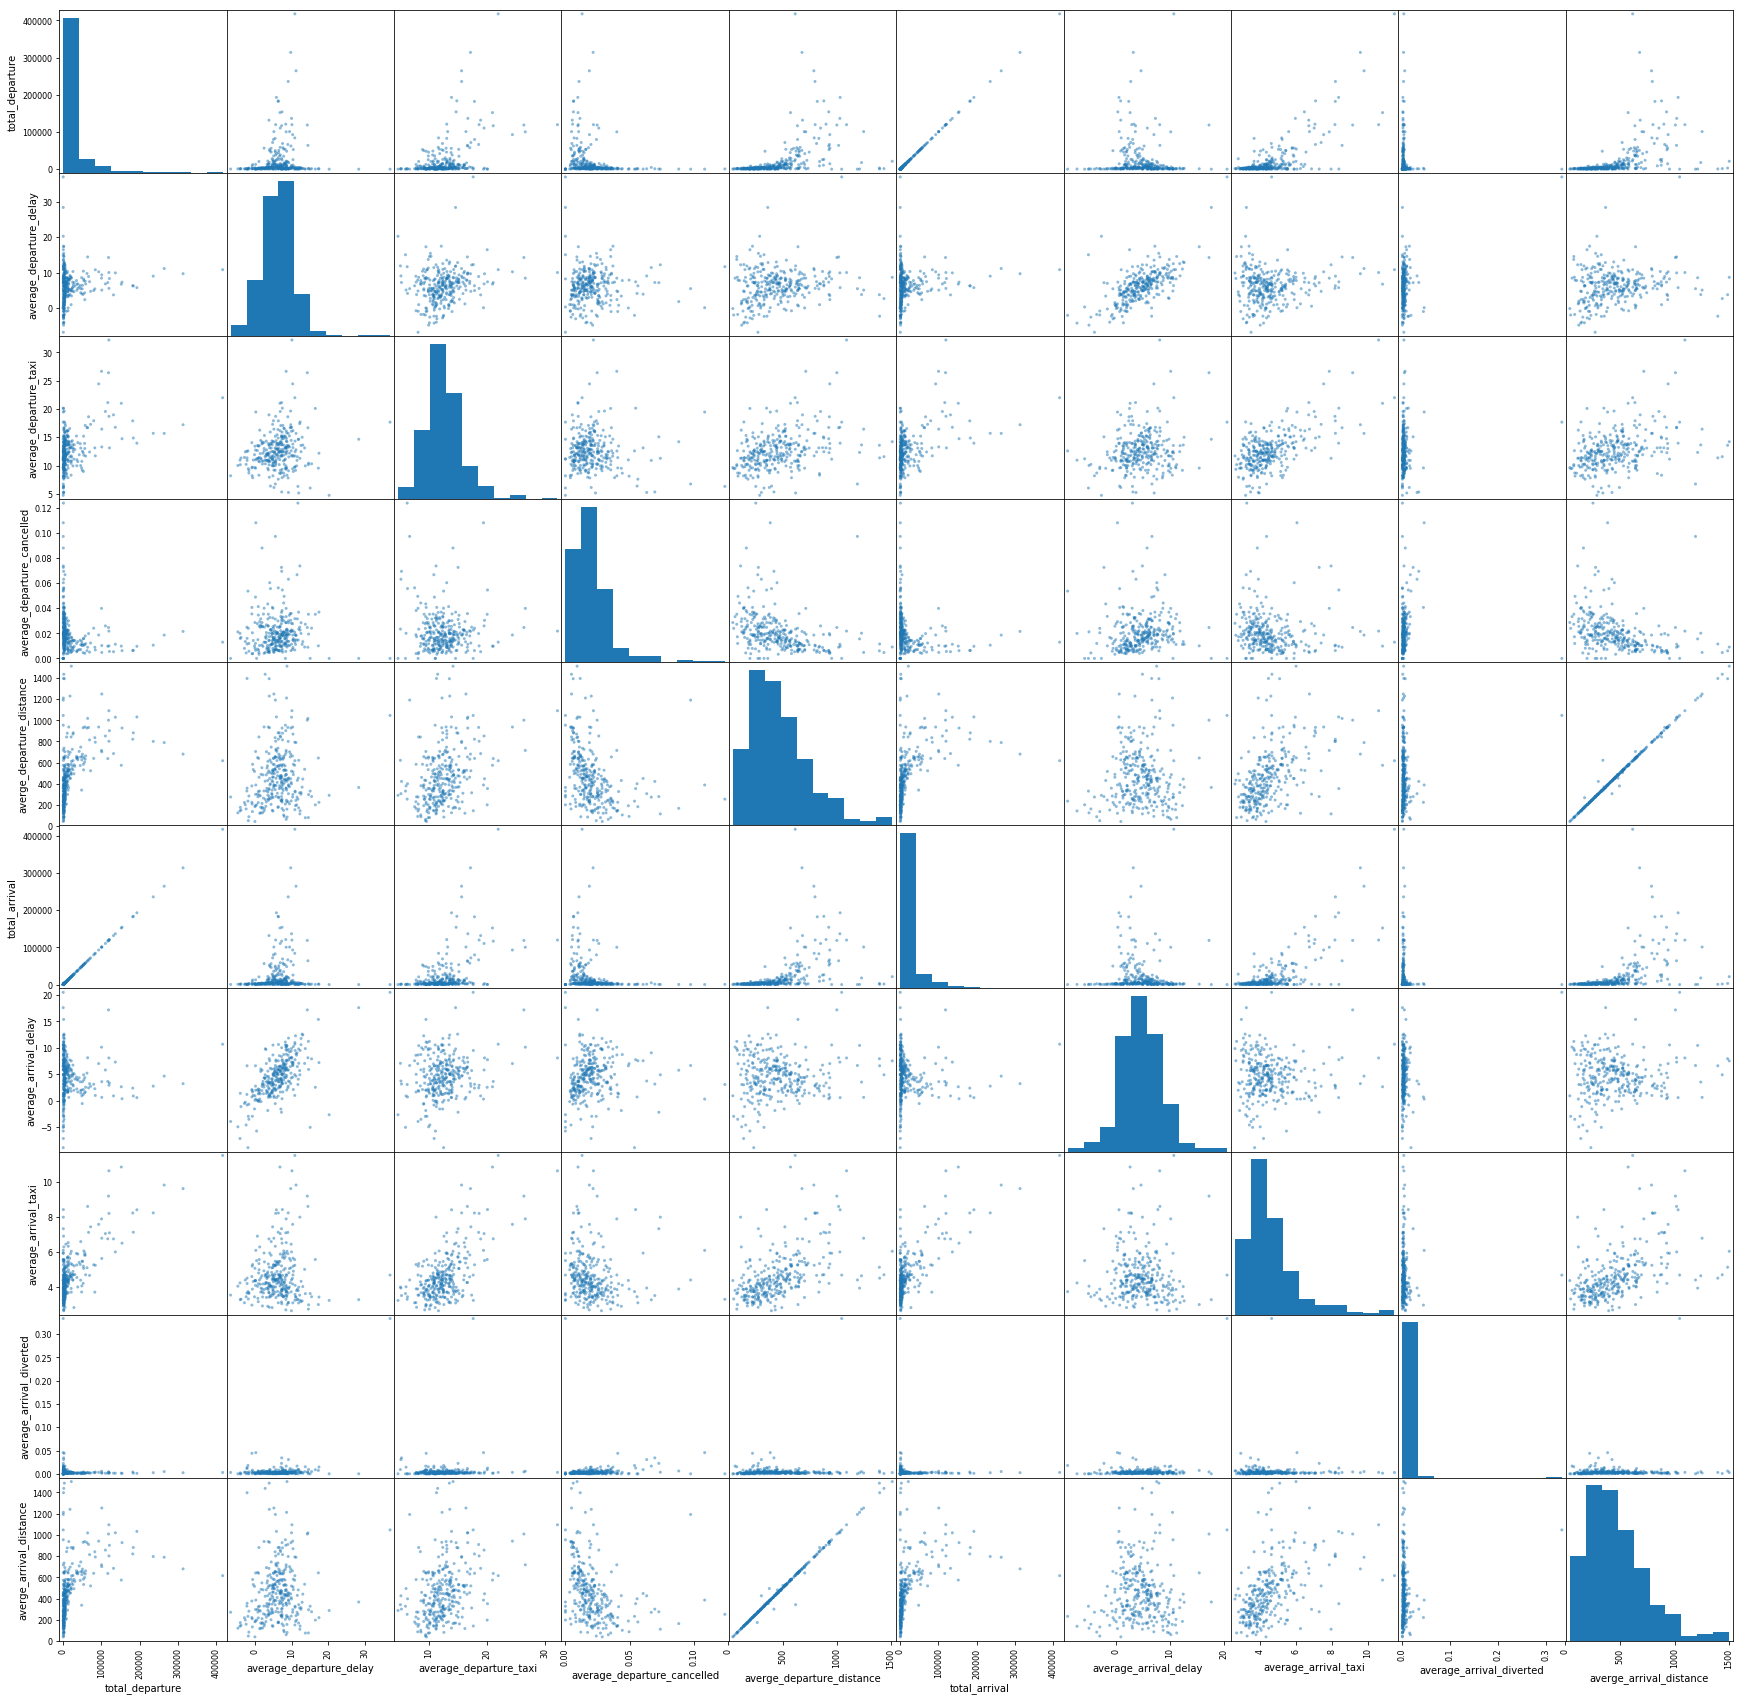

In [6]:
pd.plotting.scatter_matrix(unpleasant_2009,figsize=(30,30))
plt.savefig("test.png")

## Clean Airport Data

In [7]:
df_airport = pd.read_csv("datasets/airports/airports-extended.csv") #https://www.kaggle.com/open-flights/airports-train-stations-and-ferry-terminals#airports-extended.csv
df_airport.columns = ["ID","name","city","country","code","code4","latitude","longitude","altitude_ft","UTC_offset","DST","timezone","type","information_source"]
df_airport = df_airport.loc[:,["city","country","code","latitude","longitude","altitude_ft"]]
df_airport = df_airport[df_airport["country"]=="United States"]
df_airport = df_airport.loc[:,["city","code","latitude","longitude","altitude_ft"]]
df_airport = df_airport[df_airport["code"]!="\\N"] # remove NAN in index
df_airport = df_airport.set_index("code")

#clean city name
def clean_city_name(input_city):
    original = input_city
    input_city = str(input_city)
    input_city = input_city.strip()
    input_city = input_city.lower()
    
    input_city = input_city.replace(".","")
    input_city = input_city.replace("\\\\","")
    input_city = input_city.replace("-"," ")
    input_city = input_city.replace(" - "," ")
    input_city = input_city.replace("saint ","st")
    input_city = input_city.replace("east ","")
    input_city = input_city.replace("west ","")
    
    input_city = input_city.translate({ord(k): None for k in digits})
    
    if ('/' in input_city):
        input_city = input_city[:input_city.find('/')]
    if ('(' in input_city):
        input_city = input_city[:input_city.find('(')]
    if (',' in input_city):
        input_city = input_city[:input_city.find(',')]
    input_city = input_city.strip()   
    if (' ' in input_city):
        temp=input_city.find(' ')
        if (temp > 2):
            input_city = input_city[:input_city.find(' ')]
        else:
            if (input_city.find(' ',temp+1) != -1):
                input_city = input_city[temp+1:input_city.find(' ',temp+1)]
            else:
                input_city = input_city[temp+1:]
    input_city = input_city.strip()
    try:
        assert len(input_city) > 2
        assert input_city.replace(" ","").replace("'","").isalpha()
    except:
        print("This city name is prehaps incorrect: ",original,input_city,len(original))
    return input_city

df_airport["city"] = df_airport["city"].apply(clean_city_name)



## Clean city climate dataset

### 1. Match airport with county information

In [8]:
us_cities_df = pd.read_csv("datasets/city/uscities.csv")

us_cities_df = us_cities_df[["city","state_id","county_fips","county_name","population","density","lat","lng"]]
us_cities_df["fips"] = us_cities_df["county_fips"]

airport_prop_df = unpleasant_2009.merge(df_airport,how='inner',left_index=True,right_index=True)

def get_county_code(input_county):
    return int(input_county) % 1000

us_cities_df["county_fips"] = us_cities_df["county_fips"].apply(get_county_code)

us_cities_df["city"] = us_cities_df["city"].apply(clean_city_name)


city_climate_df = pd.DataFrame(columns=["code","population","density","avg_temp_sp","avg_temp_su","avg_temp_fa","avg_temp_wi","avg_precipitation_sp","avg_precipitation_su","avg_precipitation_fa","avg_precipitation_wi"])
city_search_df = pd.DataFrame(columns=["code","state_id","county_id","city_id","fips"])
for ind,row in airport_prop_df.iterrows():
    city = row["city"]
    target_lat = row["latitude"]
    target_lng = row["longitude"]
    try:      
        target_cities = us_cities_df[us_cities_df["city"]==city]
        
        if not (target_cities.shape[0] == 1):
            def calc_dis(input_):
                err = abs(target_lat - input_["lat"]) + abs(target_lng - input_["lng"])
                return err
            target_cities.loc[:,"error"] = (target_cities.apply(calc_dis,axis=1))
            target_city = target_cities.sort_values(by="error").iloc[0]
            
            assert target_city["error"] < 1.5
            
            target_city = target_city.drop(["error"])
        elif (target_cities.shape[0] >= 1):
            target_city = target_cities.iloc[0]
        
        county = str(target_city["county_fips"])
        if (len(county)==1):
            county = "00" + county
        elif (len(county)==2):
            county = "0" + county

        city_search_df = city_search_df.append({"code":ind,"state_id":target_city["state_id"],"county_id":county,"city_id":target_city.name,"fips":target_city["fips"]},ignore_index=True)        
    except:
        try:
            def calc_dis(input_):
                err = abs(target_lat - input_["lat"]) + abs(target_lng - input_["lng"])
                return err
            us_cities_df_copy = us_cities_df
            us_cities_df_copy.loc[:,"error"] = (us_cities_df.apply(calc_dis,axis=1))
            target_city = us_cities_df_copy.sort_values(by="error").iloc[0]
            assert target_city["error"] < 1.5
            county = str(target_city["county_fips"])
            if (len(county)==1):
                county = "00" + county
            elif (len(county)==2):
                county = "0" + county
            city_search_df = city_search_df.append({"code":ind,"state_id":target_city["state_id"],"county_id":county,"city_id":target_city.name,"fips":target_city["fips"]},ignore_index=True)
        except:
            print("No data for ",city)
            city_search_df = city_search_df.append({"code":ind,"state_id":np.nan,"county_id":np.nan,"city_id":np.nan,"fips":np.nan},ignore_index=True)

#special case for DC
for ind,row in city_search_df.iterrows():
    if (row["code"]=="DCA"):
        city_search_df.iloc[ind]["state_id"]="MD"
        city_search_df.iloc[ind]["county_id"]="511"

        
        
city_search_df = city_search_df[(city_search_df["state_id"]!="HI") & (city_search_df["state_id"]!="AK")]
        
city_search_df.head()

This city name is prehaps incorrect:  Y-O Ranch o 9
This city name is prehaps incorrect:  Ho-Ho-Kus ho 9
This city name is prehaps incorrect:  St. Jo jo 6
This city name is prehaps incorrect:  Ty Ty ty 5
This city name is prehaps incorrect:  So-Hi hi 5
This city name is prehaps incorrect:  K. I. Sawyer i 12
This city name is prehaps incorrect:  G. L. García l 12


,code,state_id,county_id,city_id,fips
0,ABE,PA,077,10988,42077
1,ABI,TX,441,5333,48441
2,ABQ,NM,001,3742,35001
3,ABY,GA,095,17309,13095
4,ACK,MA,019,19193,25019


### 2. Scrape these cities (counties)

In [9]:
def download_climate_data(state,county,year):
    save_path = "datasets/weather/"
    fname = state + county + "_" + str(year) + ".csv"
    if (len(glob.glob(save_path + fname))==0):
        URL = "https://www.ncdc.noaa.gov/cag/county/time-series/{}-{}-{}-all-1-2000-2020.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000".format(state,county,"tavg")
        r = requests.get(URL)
        file = wget.download(URL,out=save_path + "tavg/tavg_" + fname)
        URL = "https://www.ncdc.noaa.gov/cag/county/time-series/{}-{}-{}-all-1-2000-2020.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000".format(state,county,"pcp")
        r = requests.get(URL)
        file = wget.download(URL,out=save_path + "pcp/pcp_" + fname)

        df_tavg = pd.read_csv(save_path + "tavg/tavg_" + fname).iloc[4:]
        df_tavg.columns=["date","tavg","comp"]
        tavg = df_tavg.set_index("date")["tavg"]

        df_pcp = pd.read_csv(save_path + "pcp/pcp_" + fname).iloc[4:]
        df_pcp.columns=["date","pcp","comp"]
        pcp = df_pcp.set_index("date")["pcp"]

        pd.concat([tavg, pcp], axis=1).to_csv(save_path + fname)
        time.sleep(1) # not requesting too frequently

counter = 0
for ind,row in city_search_df.iterrows():
    try:
        download_climate_data(row["state_id"],row["county_id"],2018)
        download_climate_data(row["state_id"],row["county_id"],2019)
    except:
        print(row)
    counter+=1
    print("progress: {:.2f}%   Just done: {}".format(100 * counter / city_search_df.shape[0],row["code"]),end="\r")


temp_pcp_df = pd.DataFrame(columns=["code","temp_avg","pcp_avg"])
for ind,row in city_search_df.iterrows():
    state = row["state_id"]
    county = row["county_id"]
    save_path = "datasets/weather/"
    years = [2018,2019]
    
    try:
        tavg = 0
        pcp = 0
        for year in years:
            fname = state + county + "_" + str(year) + ".csv"
            temp_pcp = pd.read_csv(save_path + fname)
            tavg += temp_pcp.mean()["tavg"]
            pcp += temp_pcp.mean()["pcp"]
        tavg /= len(years)
        pcp /= len(years)
        
        temp_pcp_df = temp_pcp_df.append({"code":row["code"],"temp_avg":tavg,"pcp_avg":pcp},ignore_index=True)
        
    except:
        temp_pcp_df = temp_pcp_df.append({"code":row["code"],"temp_avg":np.nan,"pcp_avg":np.nan},ignore_index=True)



In [10]:
airport_prop_df = airport_prop_df.merge(city_search_df.set_index("code").loc[:,["city_id","fips"]],left_index=True,right_index=True)
airport_prop_df = airport_prop_df.merge(temp_pcp_df.set_index("code"),left_index=True,right_index=True)

In [11]:
airport_prop_df

,total_departure,average_departure_delay,average_departure_taxi,average_departure_cancelled,averge_departure_distance,total_arrival,average_arrival_delay,average_arrival_taxi,average_arrival_diverted,averge_arrival_distance,city,latitude,longitude,altitude_ft,city_id,fips,temp_avg,pcp_avg
ABE,4034,5.877463,13.556651,0.020327,562.069658,4037,5.126924,4.179300,0.002973,561.860045,allentown,40.652100,-75.440804,393,10988,42077,51.902490,4.161037
ABI,2490,8.685573,8.305099,0.023293,158.000000,2490,10.406404,3.518443,0.001606,158.000000,abilene,32.411301,-99.681900,1791,5333,48441,64.488797,2.131411
ABQ,35582,5.050531,9.963724,0.005312,641.429965,35577,2.210595,5.242186,0.000675,642.158726,albuquerque,35.040199,-106.609001,5355,3742,35001,54.316598,0.928465
ABY,995,7.742564,10.823409,0.021106,146.000000,997,6.965271,3.421859,0.002006,146.000000,albany,31.535500,-84.194504,197,17309,13095,66.578008,4.069336
ACK,342,16.478788,20.081818,0.035088,199.000000,343,2.516616,5.556886,0.008746,198.647230,nantucket,41.253101,-70.060204,47,19193,25019,50.793361,3.703195
ACT,1053,7.921158,8.134865,0.049383,89.000000,1052,6.996004,3.871257,0.000951,89.000000,waco,31.611300,-97.230499,516,5814,48309,66.862241,3.144440
ACV,3370,10.242683,9.438987,0.027596,272.548368,3364,4.432557,4.157654,0.008621,272.593044,arcata,40.978100,-124.109001,221,13722,6023,54.503320,5.060332
ACY,522,5.660156,12.914062,0.019157,717.333333,522,7.693359,5.236328,0.000000,717.000000,atlantic,39.457600,-74.577202,75,3361,34001,55.071369,3.960996
AEX,2947,7.656732,12.474220,0.032915,335.475738,2948,7.219555,3.433087,0.007802,335.426391,alexandria,31.327400,-92.549797,89,6089,22079,67.012033,4.880539
AGS,3107,12.303947,17.696511,0.022530,142.962665,3106,9.490616,3.222295,0.001288,143.206697,bush,33.369900,-81.964500,144,15688,17199,56.445643,4.122946


In [12]:
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
endpts = list(np.linspace(1, 12, len(colorscale) - 1))
fips = airport_prop_df['fips'].tolist()
values = airport_prop_df['temp_avg'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['usa'],
    binning_endpoints=endpts, colorscale=colorscale,
    show_state_data=False,
    show_hover=True,
    asp = 2.9,
    title_text = 'USA by Unemployment %',
    legend_title = '% unemployed'
)
fig.layout.template = None
fig.show()

ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

```
$ pip install geopandas==0.3.0
$ pip install pyshp==1.2.10
$ pip install shapely==1.6.3
```
If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/

If you are using Anaconda, do not use PIP to install the packages above. Instead use conda to install them:

```
$ conda install plotly
$ conda install geopandas
```

In [ ]:
df_airport

In [ ]:
df_airport = pd.read_csv("datasets/airports/airports-extended.csv")